In [2]:
#ML Homework 2, written by Jacob Pfaffenbichler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Initial data construction

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [100]:
#Task 1 part 1

#The data preprocessing was modified from HW1

train_copy = train_df.copy()
test_copy = test_df.copy()

train_copy =  train_copy.drop(columns=['Ticket', 'Cabin', 'Name'])
test_copy = test_copy.drop(columns=['Ticket', 'Cabin', 'Name'])

train_copy.rename(columns={"Gender": "Sex"})
train_copy["Sex"] = train_copy["Sex"].replace(["male","female"], [0,1])

test_copy.rename(columns={"Gender": "Sex"})
test_copy["Sex"] = test_copy["Sex"].replace(["male","female"], [0,1])

lowrand = train_copy['Age'].mean() - train_copy['Age'].std()
highrand = train_copy['Age'].mean() + train_copy['Age'].std()
train_copy['Age'] = train_copy['Age'].apply(lambda x: np.random.uniform(lowrand, highrand) if np.isnan(x) else x)

lowrand = test_copy['Age'].mean() - test_copy['Age'].std()
highrand = test_copy['Age'].mean() + test_copy['Age'].std()
test_copy['Age'] = test_copy['Age'].apply(lambda x: np.random.uniform(lowrand, highrand) if np.isnan(x) else x)


Embarkedmode = train_copy["Embarked"].mode().max()
train_copy["Embarked"] = train_copy["Embarked"].fillna(Embarkedmode)

#change S to 0, C to 1, and Q to 2
train_copy["Embarked"] = train_copy["Embarked"].replace(["S","C", "Q"], [0,1,2])
test_copy["Embarked"] = test_copy["Embarked"].replace(["S","C", "Q"], [0,1,2])

faremode = test_copy["Fare"].mode().max()
test_copy["Fare"] = test_copy["Fare"].fillna(faremode)


train_copy["Fare"] = np.where(train_copy['Fare'].between(-0.001,7.91), 0, train_copy['Fare'])
train_copy["Fare"] = np.where(train_copy['Fare'].between(7.91, 14.454), 1, train_copy['Fare'])
train_copy["Fare"] = np.where(train_copy['Fare'].between(14.454,31.0), 2, train_copy['Fare'])
train_copy["Fare"] = np.where(train_copy['Fare'].between(31.0, 512.330), 3, train_copy['Fare'])


test_copy["Fare"] = np.where(test_copy['Fare'].between(-0.001,7.91), 0, test_copy['Fare'])
test_copy["Fare"] = np.where(test_copy['Fare'].between(7.91, 14.454), 1, test_copy['Fare'])
test_copy["Fare"] = np.where(test_copy['Fare'].between(14.454,31.0), 2, test_copy['Fare'])
test_copy["Fare"] = np.where(test_copy['Fare'].between(31.0, 512.330), 3, test_copy['Fare'])

#Seperate into x_train and y_train

x_train = train_copy.drop(columns= ["Survived"])
y_train = train_copy["Survived"]
x_test = test_copy

In [101]:
#Part 2 Feature Selection
import sklearn as skl
from sklearn.feature_selection import SelectKBest, chi2

x_select = SelectKBest(chi2, k=4).fit_transform(x_train, y_train)
print(x_select)

#So by looking at this and comparing it to the training data, the 4 best features are:
#Pclass, Gender,and Fare
x_train = x_train.drop(columns=["PassengerId", "SibSp", "Parch", "Embarked"])
x_test = x_test.drop(columns=["PassengerId", "SibSp", "Parch", "Embarked"])


[[ 3.          0.         22.          0.        ]
 [ 1.          1.         38.          3.        ]
 [ 3.          1.         26.          1.        ]
 ...
 [ 3.          1.         27.27003234  2.        ]
 [ 1.          0.         26.          2.        ]
 [ 3.          0.         32.          0.        ]]


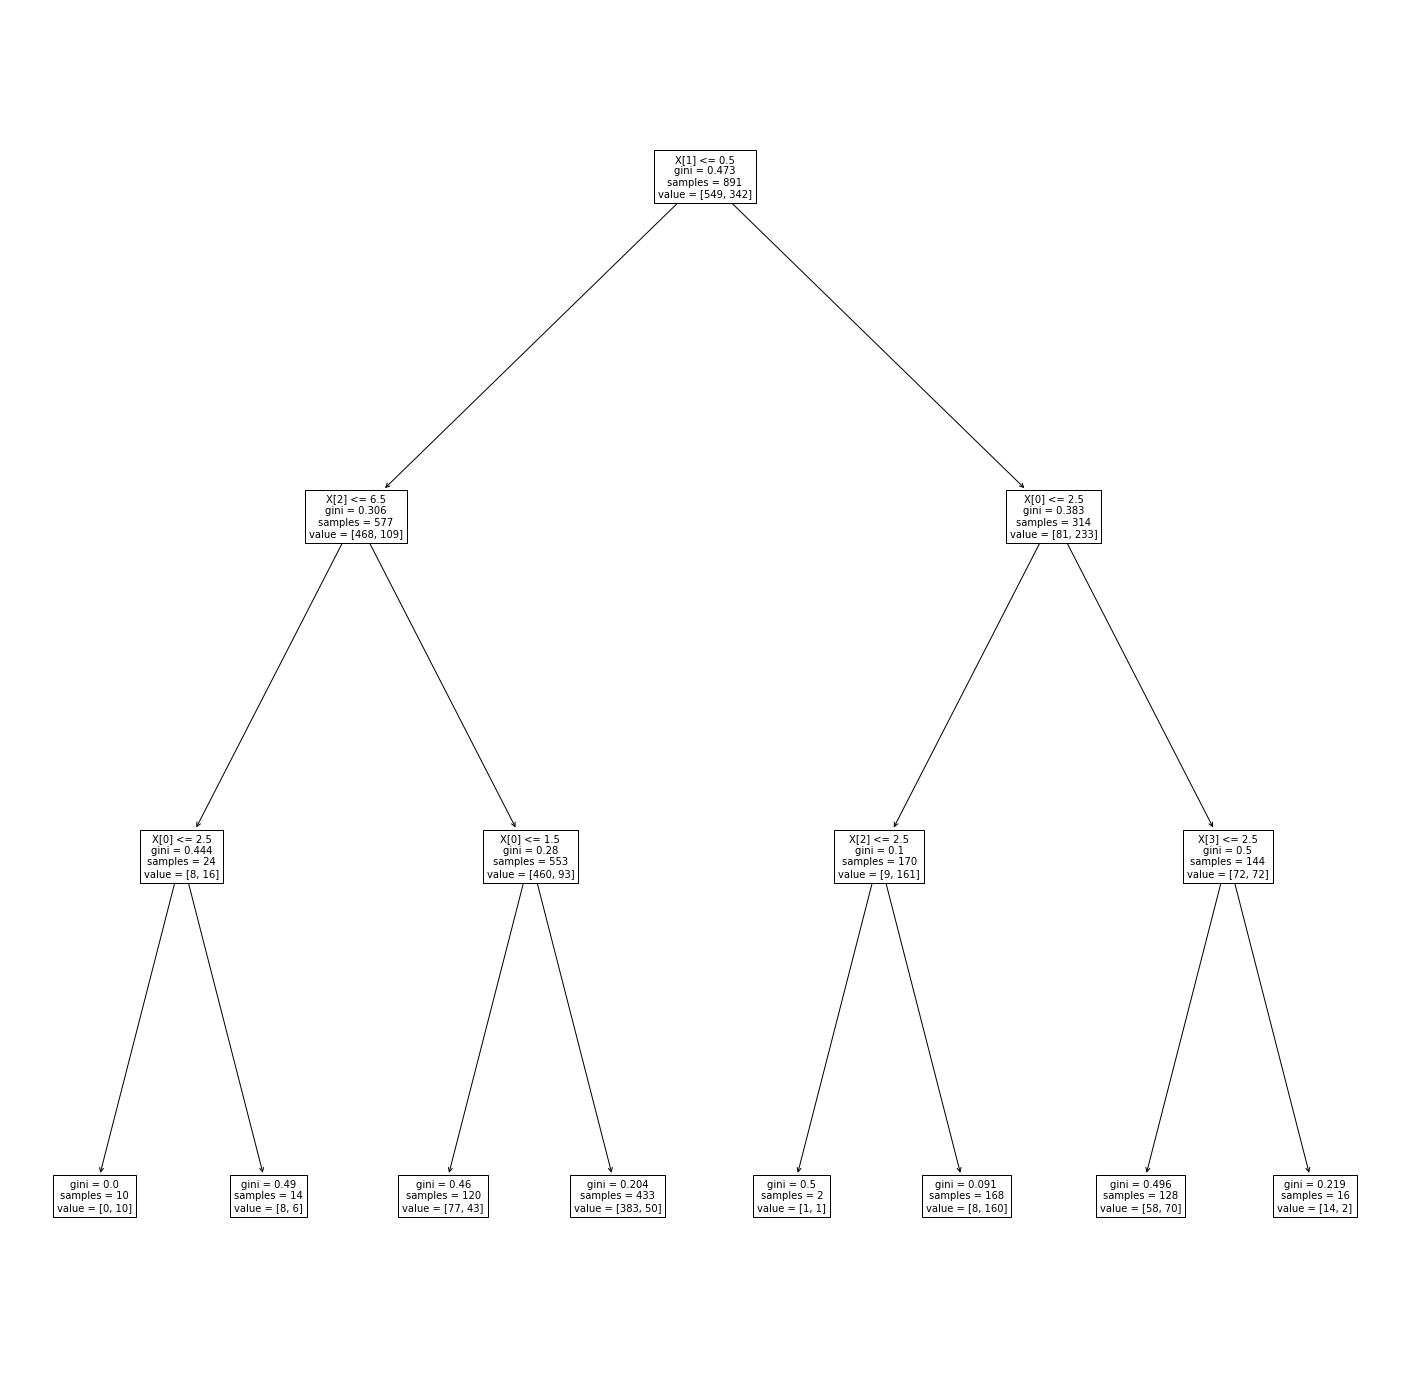

In [107]:
#Part 3, plotting
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = DecisionTreeClassifier(max_depth = 3)
plt.figure(figsize=(25, 25))
model = clf.fit(x_train, y_train)
tree.plot_tree(model, fontsize=10)
plt.show()
#X[0] = Pclass, X[1] = Sex, X[2] = Age, and X[3] = fare

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#4
print(cross_val_score(clf, x_train, y_train, cv=5).mean())
#5
rfc = RandomForestClassifier(max_depth = 3)
print(cross_val_score(rfc, x_train, y_train, cv=5).mean())


0.7699830519113677
0.8080597577051034


In [84]:
#Task 3 math
#1
entropy = -((0.4 * np.log2(0.4)) + (0.6*np.log2(0.6)))
print(entropy)

#2
a_gainf = 0 #all negative
a_gaint = -((2/7 * np.log2(2/7)) + (5/7*np.log2(5/7)))

A_gain = 0.3 * a_gainf + 0.7 * a_gaint

print(entropy-A_gain)

#3
b_gainf = -((1/6 * np.log2(1/6)) + (5/6*np.log2(5/6)))
b_gaint = -((1/4 * np.log2(1/4)) + (3/4*np.log2(3/4)))

b_gain = 0.6 * b_gainf + 0.4 * b_gaint

print(entropy-b_gain)


0.9709505944546686
0.3667661964580269
0.256425891682003
